# Homework 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("homework_3.1.csv",  index_col=0)

In [3]:
print(df.head())

   time    value1    value2    value3
0     0  1.764052  1.883151 -0.369182
1     1  0.420157 -1.327759 -0.219379
2     2  1.018738 -1.230485  1.139660
3     3  2.300893  1.029397  0.715264
4     4  1.947558 -1.093123  0.720132


## Question 1 & 2

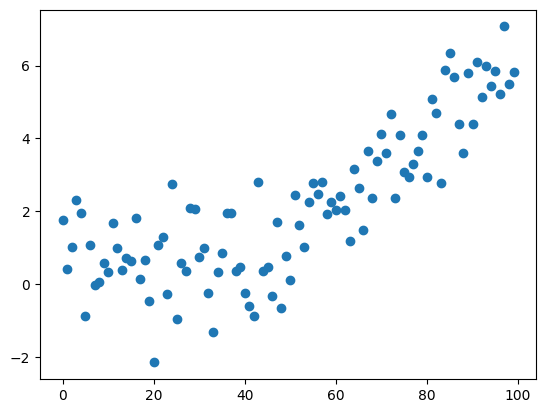

In [4]:
plt.scatter(df['time'], df['value1'])

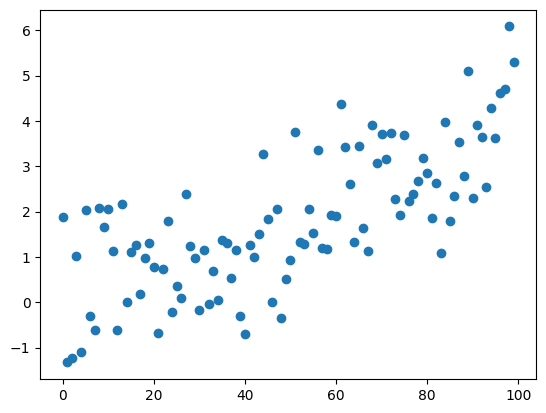

In [5]:
plt.scatter(df['time'], df['value2'])

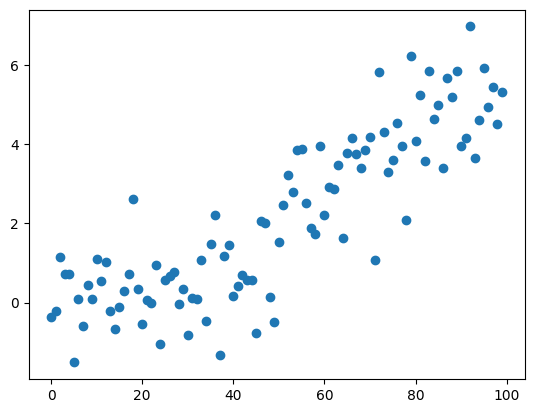

In [6]:
plt.scatter(df['time'], df['value3'])

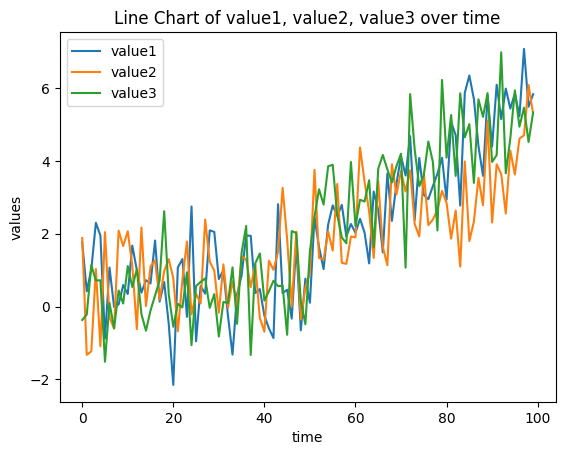

In [7]:
df.plot(x='time', y=['value1', 'value2', 'value3'], kind='line')
plt.xlabel('time')
plt.ylabel('values')
plt.title('Line Chart of value1, value2, value3 over time')
plt.show()

In [8]:
# Value 1 Model

# Create event indicator
df['event'] = (df['time'] >= 50).astype(int)
df['time_after'] = df['time'] * df['event']

# Model A: discontinuity in value only
model_value = smf.ols('value1 ~ time + event', data=df).fit()
print(model_value.summary())

# Model B: discontinuity in slope
model_slope = smf.ols('value1 ~ time + event + time_after', data=df).fit()
print(model_slope.summary())

                            OLS Regression Results                            
Dep. Variable:                 value1   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     90.57
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           6.48e-23
Time:                        13:10:02   Log-Likelihood:                -160.63
No. Observations:                 100   AIC:                             327.3
Df Residuals:                      97   BIC:                             335.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4439      0.271     -1.640      0.1

In [9]:
# Value 2 Model

# Create event indicator
df['event'] = (df['time'] >= 50).astype(int)
df['time_after'] = df['time'] * df['event']

# Model A: discontinuity in value only
model_value = smf.ols('value2 ~ time + event', data=df).fit()
print(model_value.summary())

# Model B: discontinuity in slope
model_slope = smf.ols('value2 ~ time + event + time_after', data=df).fit()
print(model_slope.summary())

                            OLS Regression Results                            
Dep. Variable:                 value2   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     56.92
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           4.44e-17
Time:                        13:10:02   Log-Likelihood:                -146.89
No. Observations:                 100   AIC:                             299.8
Df Residuals:                      97   BIC:                             307.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0418      0.236      0.177      0.8

In [10]:
# Value 3 Model

# Create event indicator
df['event'] = (df['time'] >= 50).astype(int)
df['time_after'] = df['time'] * df['event']

# Model A: discontinuity in value only
model_value = smf.ols('value3 ~ time + event', data=df).fit()
print(model_value.summary())

# Model B: discontinuity in slope
model_slope = smf.ols('value3 ~ time + event + time_after', data=df).fit()
print(model_slope.summary())

                            OLS Regression Results                            
Dep. Variable:                 value3   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           2.33e-32
Time:                        13:10:02   Log-Likelihood:                -141.75
No. Observations:                 100   AIC:                             289.5
Df Residuals:                      97   BIC:                             297.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5235      0.224     -2.337      0.0

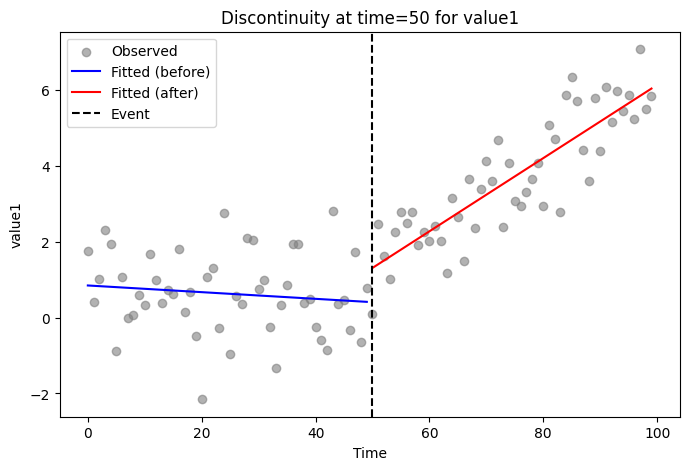

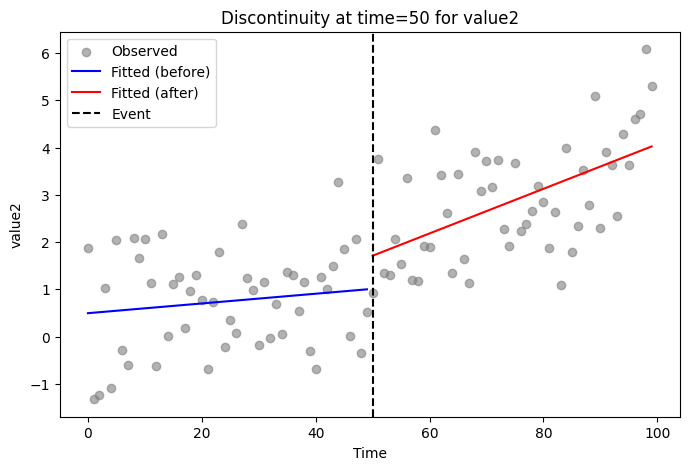

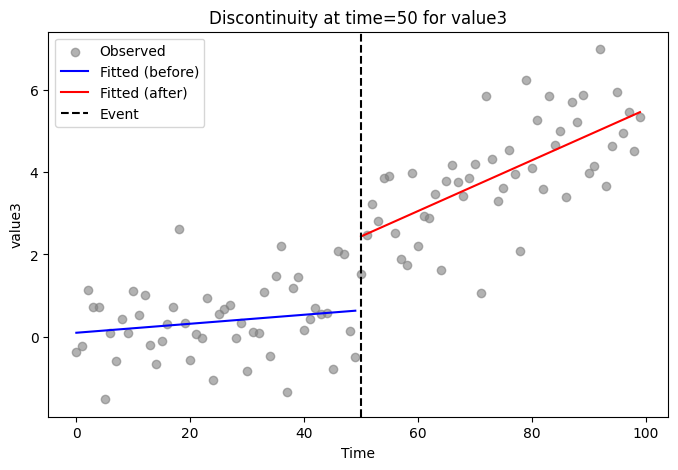

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

def plot_discontinuity(df, var, event_time=50):
    # Create event indicators
    df['event'] = (df['time'] >= event_time).astype(int)
    df['time_after'] = df['time'] * df['event']
    
    # Fit model with slope change
    model = smf.ols(f'{var} ~ time + event + time_after', data=df).fit()
    
    # Predictions
    df['fitted'] = model.predict(df)
    
    # Plot raw data
    plt.figure(figsize=(8,5))
    plt.scatter(df['time'], df[var], alpha=0.6, label='Observed', color='gray')
    
    # Plot fitted lines separately for before and after event
    before = df[df['time'] < event_time]
    after = df[df['time'] >= event_time]
    plt.plot(before['time'], before['fitted'], color='blue', label='Fitted (before)')
    plt.plot(after['time'], after['fitted'], color='red', label='Fitted (after)')
    
    # Mark event line
    plt.axvline(event_time, color='black', linestyle='--', label='Event')
    
    plt.title(f'Discontinuity at time={event_time} for {var}')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()
    plt.show()

# Example usage:
plot_discontinuity(df, 'value1')
plot_discontinuity(df, 'value2')
plot_discontinuity(df, 'value3')

## Question 3

In [12]:
dfa = pd.read_csv("homework_3.2.a.csv", index_col=0)
dfb = pd.read_csv("homework_3.2.b.csv", index_col=0)

In [13]:
print(dfa.head())

   group1  time1  outcome1
0       0      0  0.882026
1       0      1  1.600079
2       0      0  0.489369
3       0      1  2.520447
4       0      0  0.933779


In [14]:
print(dfb.head())

   group2  time2  outcome2
0       0      0  0.667155
1       0      1  2.470969
2       0      0 -0.506778
3       0      1  1.525657
4       0      0  0.273664


In [15]:
import statsmodels.formula.api as smf

# Dataset A
model_A = smf.ols("outcome1 ~ time1 + group1 + time1:group1", data=dfa).fit()
print(model_A.summary())

# Dataset B
model_B = smf.ols("outcome2 ~ time2 + group2 + time2:group2", data=dfb).fit()
print(model_B.summary())

                            OLS Regression Results                            
Dep. Variable:               outcome1   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2964.
Date:                Sat, 04 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:10:03   Log-Likelihood:                -712.28
No. Observations:                1000   AIC:                             1433.
Df Residuals:                     996   BIC:                             1452.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0258      0.031     -0.829   

In [16]:
df['event'] = (df['time'] >= 50).astype(int)
df['time_sq'] = df['time']**2
df['time_event'] = df['time'] * df['event']
df['time_sq_event'] = df['time_sq'] * df['event']

model = smf.ols('value1 ~ time + time_sq + event + time_event + time_sq_event', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 value1   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     71.17
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           1.97e-30
Time:                        13:10:03   Log-Likelihood:                -135.02
No. Observations:                 100   AIC:                             282.0
Df Residuals:                      94   BIC:                             297.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9969      0.393      2.539